In [4]:
import numpy as np

DATA_PATH = "/public/liujiawei/huawei/ZHB/ADF-master/mnist/"
X_train = np.load(DATA_PATH+"mnist_train.npy")
Y_train = np.load(DATA_PATH+"mnist_train_label.npy")
X_test = np.load(DATA_PATH+"mnist_test.npy")
Y_test = np.load(DATA_PATH+"mnist_test_label.npy")

In [5]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [6]:
input_shape = 28*28

model = Sequential()
model.add(Dense(input_shape=(input_shape,), units=input_shape, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
MODEL_PATH = "/public/liujiawei/huawei/ZHB/ADF-master/models/"
model = load_model(MODEL_PATH+"mnist_FC4.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
from tensorflow.keras import backend as BE
import tensorflow as tf
from progressbar import ProgressBar
pbar = ProgressBar()

max_iter = 1e+3
class_num = 1
decay_factor_gradent = 0.1
decay_factor_epsilon_lr = 0.99

x_GE = np.zeros((1, 28*28))
per_tmp = model.predict(x_GE)
label_tmp = np.argmax(per_tmp)

grads = BE.gradients(loss = BE.categorical_crossentropy([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], model.layers[-1].output[:,:]), variables = model.inputs)
# grads = BE.gradients(loss = model.layers[-1].output[:,label_tmp], variables = model.inputs)
get_gradients = BE.function(inputs=model.inputs[0], outputs=grads)
x_moment = 0
epsilon_lr = 1e-01

for iter_i in pbar(range(0, int(max_iter))):
    x_grad = get_gradients(x_GE)[0]
    x_moment = x_moment * decay_factor_gradent + x_grad
    epsilon_lr = epsilon_lr * decay_factor_epsilon_lr
    x_GE = x_GE - x_moment * epsilon_lr
    x_GE = np.clip(x_GE, 0, 1)
    per_tmp = model.predict(x_GE)
label_tmp = np.argmax(per_tmp)
print('label:', label_tmp, '\t label confidence:', per_tmp[0,label_tmp], '\t iterations:',iter_i)
x_GE_mean = x_GE

label: 9 	 label confidence: 0.10879336 	 iterations: 999


In [23]:
print(model.predict(np.zeros((1, 28*28))))
print(model.predict(x_GE_mean))

[[0.03599543 0.03796388 0.04389489 0.07768445 0.0568649  0.3583802
  0.07075359 0.04217588 0.16861665 0.10767015]]
[[0.10800163 0.07271519 0.10193403 0.09254989 0.09664927 0.10608687
  0.10761338 0.09791845 0.10773791 0.10879336]]


In [20]:
from tensorflow.keras import backend as BE
import tensorflow as tf
max_iter = 1e+2
class_num = 10
decay_factor_gradent = 0.1
decay_factor_epsilon_lr = 0.99
# input_tensors = BE.placeholder(shape=(None, 28*28))
# grads = BE.gradients(loss = model.total_loss, variables = model.inputs)
x_GE_all = []

for label_i in range(0,class_num):
    x_GE = np.zeros((1, 28*28))
#     per_tmp = model.predict(x_GE)
#     label_tmp = np.argmax(per_tmp)
#     print('label:', label_tmp, '\t label confidence:', per_tmp[0,label_tmp])

    grads = BE.gradients(loss = model.layers[-1].output[:,label_i], variables = model.inputs)
    get_gradients = BE.function(inputs=model.inputs[0], outputs=grads)
    x_moment = 0
    epsilon_lr = 5e-1
    for iter_i in range(0, int(max_iter)):
        x_grad = get_gradients(x_GE)[0]
        x_moment = x_moment * decay_factor_gradent + x_grad
        epsilon_lr = epsilon_lr * decay_factor_epsilon_lr
        x_GE = x_GE + x_moment * epsilon_lr
        x_GE = np.clip(x_GE, 0, 1)
        per_tmp = model.predict(x_GE)
        if 1-per_tmp[0, label_i]<1e-6 :
            break
    label_tmp = np.argmax(per_tmp)
    print('label:', label_tmp, '\t label confidence:', per_tmp[0,label_tmp], '\t iterations:',iter_i)
    x_GE_all.append(x_GE)

label: 0 	 label confidence: 0.99999964 	 iterations: 3
label: 1 	 label confidence: 0.9997278 	 iterations: 99
label: 2 	 label confidence: 1.0 	 iterations: 1
label: 3 	 label confidence: 1.0 	 iterations: 2
label: 4 	 label confidence: 0.9999999 	 iterations: 1
label: 5 	 label confidence: 1.0 	 iterations: 0
label: 6 	 label confidence: 1.0 	 iterations: 1
label: 7 	 label confidence: 0.99999905 	 iterations: 3
label: 8 	 label confidence: 0.9991548 	 iterations: 99
label: 9 	 label confidence: 0.99981195 	 iterations: 99


0
1
2
3
4
5
6
7
8
9


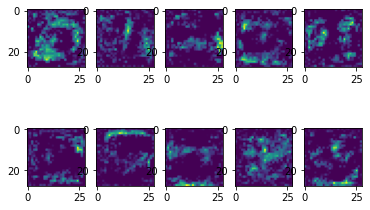

In [21]:
import matplotlib.pyplot as plt

plt.figure()
hang = 2
lie = 5
for i in range(0,hang):
    for j in range(0,lie):
        plt.subplot(hang,lie,i*lie+j+1)
        plt.imshow(x_GE_all[i*lie+j].reshape((28,28,1)))
        print(np.argmax(model.predict(x_GE_all[i*lie+j])))


9


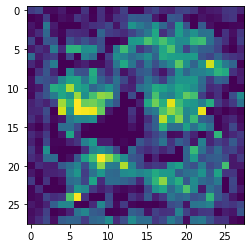

In [24]:
plt.figure()
plt.subplot(111)
plt.imshow(x_GE_mean.reshape((28,28,1)))
print(np.argmax(model.predict(x_GE_mean)))

In [25]:
x_GE_all.append(x_GE_mean)

In [27]:
np.save(DATA_PATH+'mnist_GE.npy',x_GE_all)

In [18]:
# 绘制图片

# import matplotlib.pyplot as plt

# plt.figure()
# plt.subplot(221)
# plt.imshow(X_test[0].reshape((28,28,1)))
# print(np.argmax(model.predict(X_test[0:1])))

# plt.subplot(222)
# plt.imshow(X_test[1].reshape((28,28,1)))
# print(np.argmax(model.predict(X_test[1:2])))

# plt.subplot(223)
# plt.imshow(X_test[2].reshape((28,28,1)))
# print(np.argmax(model.predict(X_test[2:3])))

# plt.subplot(224)
# plt.imshow(X_test[3].reshape((28,28,1)))
# print(np.argmax(model.predict(X_test[3:4])))